In [18]:
import yt
from yt import derived_field

import trident

import numpy as np 

from astropy.table import Table
import astropy.units as u

import os
os.sys.path.insert(0, '/Users/molly/Dropbox/foggie/foggie')

from consistency import *
from get_halo_center import get_halo_center
import utils.get_proper_box_size
#from utils.get_proper_box_size import get_proper_box_size
from modular_plots import get_refine_box

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'
import matplotlib.pyplot as plt
from matplotlib import cm


In [7]:
%matplotlib inline

In [56]:
# ds = yt.load("/astro/simulations/FOGGIE/halo_008508/nref11n/nref11n_nref10f_refine200kpc/RD0020/RD0020")
#ds = yt.load("/Users/molly/FOGGIE/halo_008508/orig_nref11n/nref11n_nref10f/RD0020/RD0020")
ds = yt.load("/Users/molly/FOGGIE/halo_008508/nref11n_nref10f/RD0020/RD0020")

# ds = yt.load("/astro/simulations/FOGGIE/halo_008508/nref11n_selfshield_z15/natural/RD0013/RD0013")
# trident.add_ion_fields(ds, ions=['C IV', 'O VI', 'H I', 'Si II', 'C II', 'Si III'])


yt : [INFO     ] 2019-06-14 15:34:56,079 Parameters: current_time              = 154.80103271343
yt : [INFO     ] 2019-06-14 15:34:56,080 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-06-14 15:34:56,081 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-06-14 15:34:56,082 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-06-14 15:34:56,083 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-06-14 15:34:56,084 Parameters: current_redshift          = 1.9999996880027
yt : [INFO     ] 2019-06-14 15:34:56,084 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2019-06-14 15:34:56,085 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2019-06-14 15:34:56,087 Parameters: hubble_constant           = 0.695


In [57]:
#track_name = "halo_tracks/008508/nref11n_orig/halo_track_200kpc"
track_name = "halo_tracks/008508/nref11n_selfshield_15/halo_track_200kpc_nref10"
track = Table.read(track_name, format='ascii')
track.sort('col1')
zsnap = ds.get_parameter('CosmologyCurrentRedshift')
proper_box_size = get_proper_box_size(ds)

refine_box, refine_box_center, refine_width_code = get_refine_box(ds, 2.00, track) # 2.05  for old
refine_width = refine_width_code * proper_box_size

# center is trying to be the center of the halo
center, velocity = get_halo_center(ds, refine_box_center)



Parsing Hierarchy : 100%|██████████| 4248/4248 [00:00<00:00, 25624.75it/s]

inside get_refine_box 2.0
using this loc:      col1       col2     col3     col4     col5     col6     col7   col8
------------- -------- -------- -------- -------- -------- -------- ----
1.99979384142 0.493035 0.487894 0.501194 0.495035 0.489894 0.503194   10
get_halo_centers:  code_length code_velocity



yt : [INFO     ] 2019-06-14 15:35:03,101 Gathering a field list (this may take a moment.)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/yt/units/yt_array.py:978: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ret = super(YTArray, self).__getitem__(item)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/yt/fields/fluid_fields.py:201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_field[slice_3d] = f


Located the main halo at: [0.4940366744995117, 0.4888906478881836, 0.5021944046020508] [-0.000660898924591151 code_velocity, -0.0009469337482557373 code_velocity, 0.0012286870715524274 code_velocity]


In [14]:

h1_color_map = sns.blend_palette(("white", "#ababab", "#565656", "black",
                                  "#4575b4", "#984ea3", "#d73027",
                                  "darkorange", "#ffe34d"), as_cmap=True)
h1_proj_min = 1.e12
h1_proj_max = 1.e24


yt : [INFO     ] 2019-06-14 15:36:02,663 Projection completed
yt : [INFO     ] 2019-06-14 15:36:02,666 xlim = 0.501234 0.503154
yt : [INFO     ] 2019-06-14 15:36:02,666 ylim = 0.493075 0.494995
yt : [INFO     ] 2019-06-14 15:36:02,667 xlim = 0.501234 0.503154
yt : [INFO     ] 2019-06-14 15:36:02,669 ylim = 0.493075 0.494995
yt : [INFO     ] 2019-06-14 15:36:02,672 Making a fixed resolution buffer of (('gas', 'H_p0_number_density')) 800 by 800



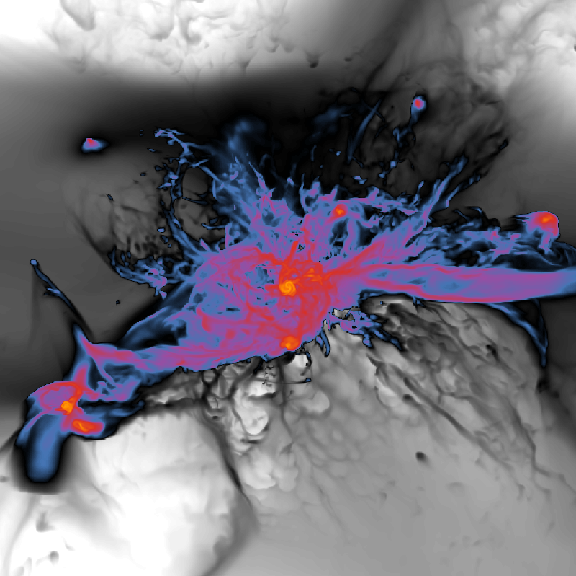

In [58]:
p = yt.ProjectionPlot(ds, 'y', ('gas','H_p0_number_density'), center=refine_box_center, data_source=refine_box, width=(0.96*refine_width,'kpc'))
p.set_cmap(('gas','H_p0_number_density'),h1_color_map)
p.set_zlim(('gas','H_p0_number_density'),h1_proj_min, h1_proj_max)
p.hide_colorbar()
p.hide_axes()
# p.annotate_scale(size_bar_args={'color':'white'})
p.show()

In [59]:
plot = p.plots['H_p0_number_density']
p._setup_plots()



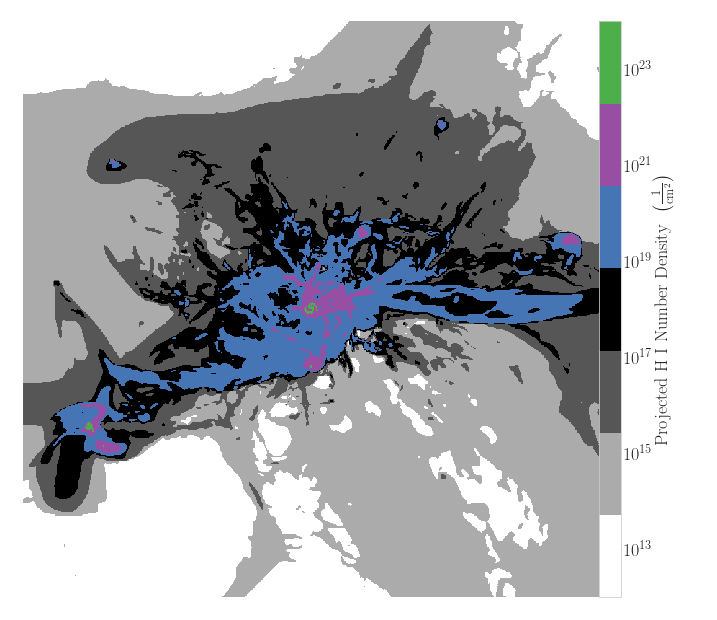

In [60]:
new_h1_color_map = sns.blend_palette(("white", "#ababab", "#565656", "black",
                                  "#4575b4", "#984ea3", "#d73027",
                                  "darkorange", "#ffe34d"), as_cmap=True)

# LLS: [17.2, 19.0], sub-DLA: [19.0, 20.3], DLA: [20.3, more]
bounds = [10**13.8, 10**15.5, 10**17.2, 10**19.0, 10**20.3]
## from 12 to 24 in 0.1 dex is 120. 17.2 = 52; 19 = 70; 20.3 = 83

discrete_h1_color_map = mpl.colors.ListedColormap(["white", "#ababab", "#565656", "black",\
                                  "#4575b4", "#984ea3", '#4daf4a'])


p.set_cmap(('gas','H_p0_number_density'),discrete_h1_color_map)
p.show_colorbar()

In [61]:
greys = cm.get_cmap('gray_r', 700)
newcolors = greys(np.linspace(0, 1, 240))

newcolors[:104] = greys(np.linspace(0, 1, 104))


my_blue = np.array([69/256, 117/256, 180/256, 1]) #  R:69, G:117, B:180 
blues = sns.blend_palette(('#88A7CF','#4575b4','#2C4B73'), 36, as_cmap = True)
newcolors[104:140] = blues(np.linspace(0,1,36))

my_purple = np.array([152/256, 78/256, 163/256, 1]) # R:152, G:78, B:163 
purples = sns.blend_palette(('#BD8DC4','#984EA3','#623268'), 26, as_cmap = True)
newcolors[140:166] = purples(np.linspace(0,1,26))

my_green = np.array([77/256, 175/256, 74/256, 1]) # R:77, G:175, B:74 
greens = sns.blend_palette(('#8DCC8B','#4DAF4A','#32702F'), 74, as_cmap = True)
newcolors[166:240] = greens(np.linspace(0,1,74))
newcmp = mpl.colors.ListedColormap(newcolors)
p.set_cmap(('gas','H_p0_number_density'),newcmp)
p.save('HI_for_Howk_nref10f.pdf')

yt : [INFO     ] 2019-06-14 15:36:03,950 Saving plot HI_for_Howk_nref10f.pdf


['HI_for_Howk_nref10f.pdf']

In [41]:
greys = cm.get_cmap('gray_r', 700)
greys = cm.get_cmap('gray_r', 700)
newcolors = greys(np.linspace(0, 1, 240))

newcolors[:104] = greys(np.linspace(0, 1, 104))

len(newcolors[166:240])

74

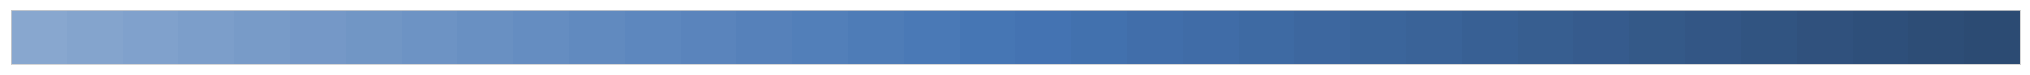

In [36]:
sns.palplot(sns.blend_palette(('#88A7CF','#4575b4','#2C4B73'), 36))
sns.blend_palette(('#88A7CF','#4575b4','#2C4B73'), 36, as_cmap = True)